In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('C:/Users/amant/OneDrive/Desktop/Files-main/Files-main/Sales_LinReg.csv')
data.head()

,Republic,NDTV,TV5,TV9,AajTak,sales
0,8.7,48.9,4.0,75.0,49.0,7.2
1,57.5,32.8,65.9,23.5,57.5,11.8
2,120.2,19.6,7.2,11.6,18.5,13.2
3,8.6,2.1,46.0,1.0,2.6,4.8
4,199.8,2.6,52.9,21.2,2.9,10.6


In [5]:
# to understand the statistics of dataset
data.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,295.000000,300.000000,305.000000,297.000000,300.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,87.330161,14.781927,20.290023,21.411180,15.853789,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,74.050000,9.125000,15.900000,10.900000,10.000000,10.300000
50%,149.800000,21.050000,26.200000,23.500000,21.300000,12.800000
75%,221.450000,35.650000,39.600000,43.000000,36.900000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


In [11]:
data['Republic'] = data['Republic'].fillna(data['Republic'].mode()[0])
data['NDTV'] = data['NDTV'].fillna(data['NDTV'].mode()[0])
data['TV9'] = data['TV9'].fillna(data['TV9'].mode()[0])
data['AajTak'] = data['AajTak'].fillna(data['AajTak'].mode()[0])

In [12]:
data.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,149.341967,22.042295,29.459344,28.333770,23.781607,13.811475
std,86.131786,14.842325,20.290023,21.372694,15.855371,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,75.100000,8.400000,15.900000,9.400000,10.100000,10.300000
50%,163.500000,20.900000,26.200000,23.200000,21.700000,12.800000
75%,220.300000,35.600000,39.600000,41.800000,37.600000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


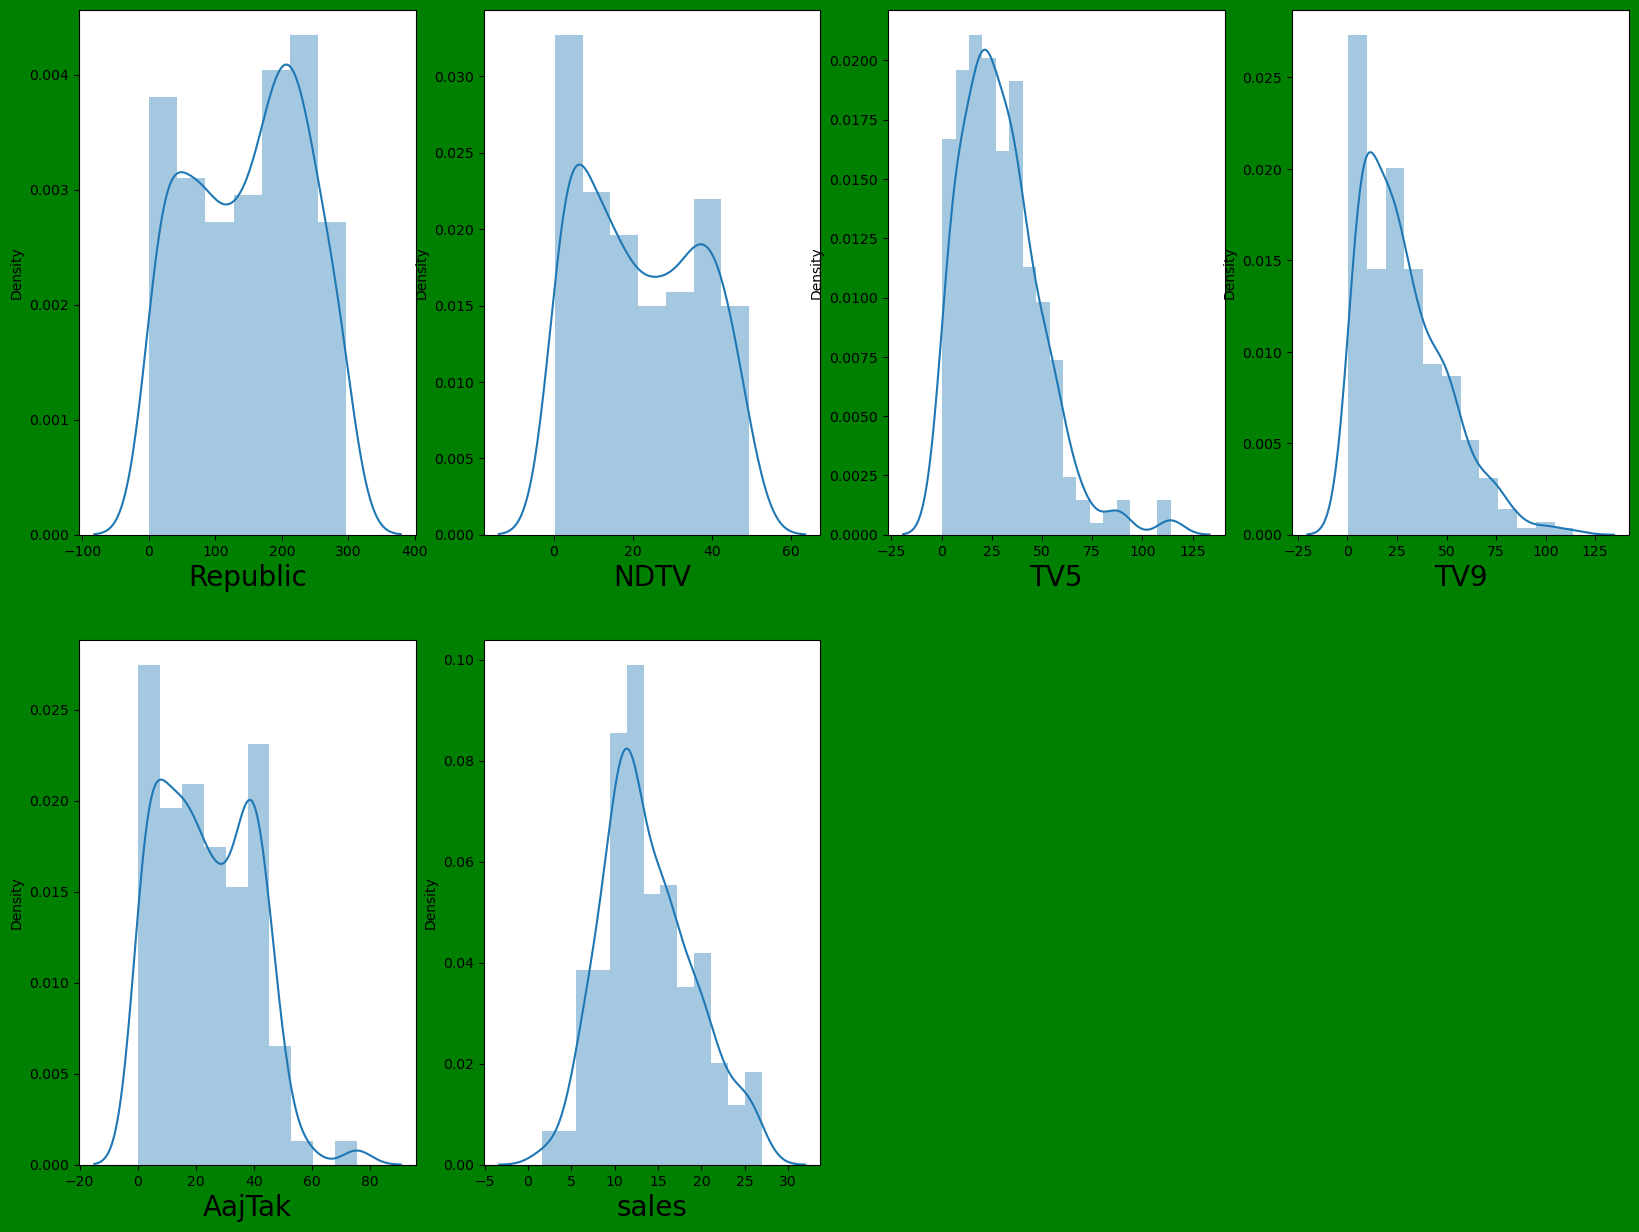

In [15]:
plt.figure(figsize = (20,15),facecolor = 'green')
plotnumber = 1

for column in data:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
    
    plotnumber +=1
plt.show()

In [20]:
# deviding dataset into features and label
x = data.drop(columns = ['sales'])
y = data['sales']

In [18]:
x

,Republic,NDTV,TV5,TV9,AajTak
0,8.7,48.9,4.0,75.0,49.0
1,57.5,32.8,65.9,23.5,57.5
2,120.2,19.6,7.2,11.6,18.5
3,8.6,2.1,46.0,1.0,2.6
4,199.8,2.6,52.9,21.2,2.9
...,...,...,...,...,...
300,286.0,13.9,35.2,3.7,13.9
301,18.7,12.1,23.7,23.4,18.7
302,39.5,41.1,17.6,5.8,39.5
303,75.5,10.8,8.3,6.0,75.5


In [21]:
y

0       7.2
1      11.8
2      13.2
3       4.8
4      10.6
       ... 
300    15.9
301     6.7
302    10.8
303     9.9
304     5.9
Name: sales, Length: 305, dtype: float64

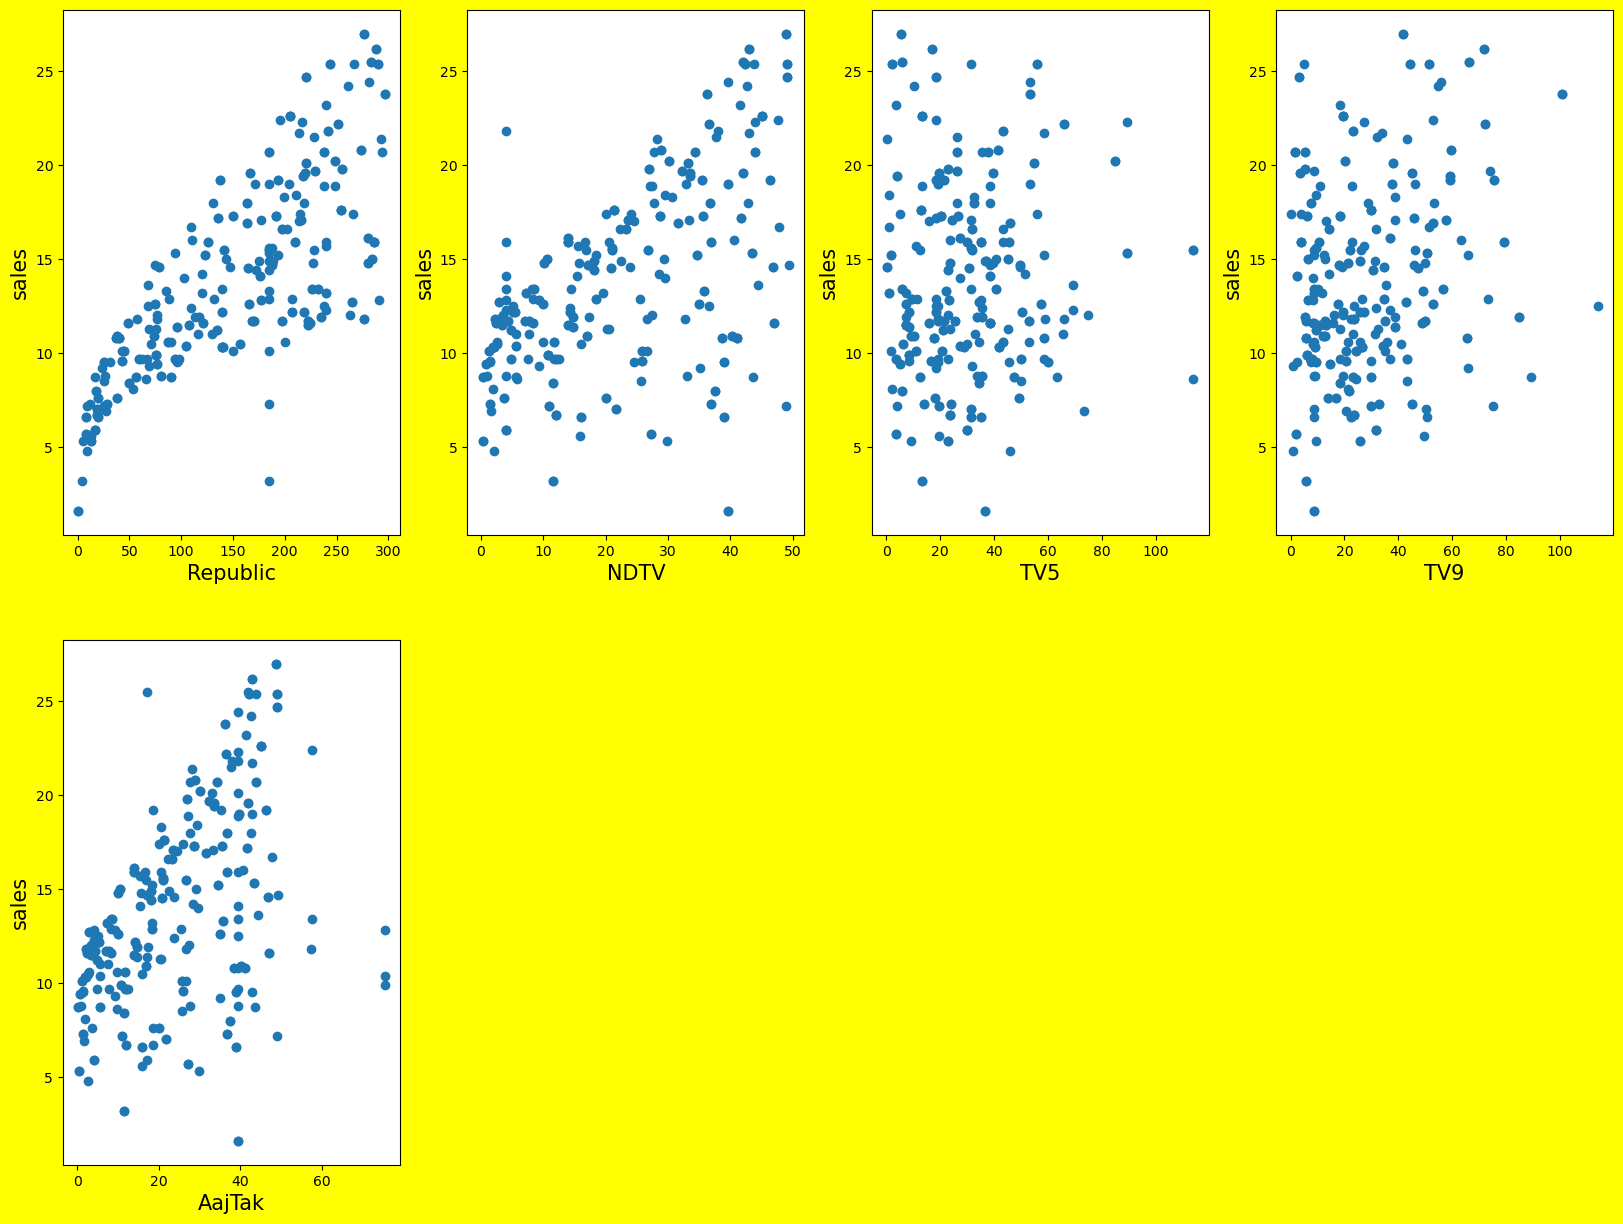

In [28]:
plt.figure(figsize = (20,15),facecolor = 'yellow')
plotnumber = 1

for column in x:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize = 15)
        plt.ylabel('sales',fontsize = 15)
    
    plotnumber +=1
plt.show()

In [30]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [31]:
#Train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.75, random_state = 41)

# model building


In [34]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [37]:
reg.score(x_train,y_train)

0.8624005338592293

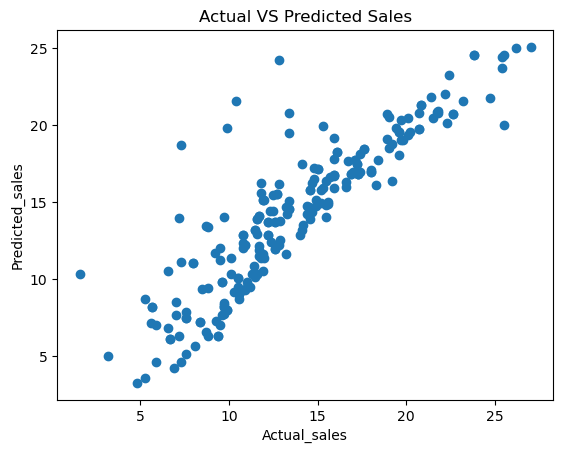

In [44]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual_sales")
plt.ylabel('Predicted_sales')
plt.title('Actual VS Predicted Sales')
plt.show()

In [56]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [58]:
lassocv = LassoCV(alphas = None, max_iter = 10)
lassocv.fit(x_train, y_train)

LassoCV(max_iter=10)

In [59]:
alpha = lassocv.alpha_
alpha

0.1530521603006551

In [61]:
lass_reg = Lasso(alpha)
lass_reg.fit(x_train, y_train)

Lasso(alpha=0.1530521603006551)

In [62]:
lass_reg.score(x_test,y_test)

0.8494655037791965

In [63]:
np.arange(0.001, 0.1, 10.01)

array([0.001])

In [66]:
ridgecv = RidgeCV(alphas = np.arange(0.001, 0.1, 10.01))
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001]))

In [71]:
ridgecv.alpha_
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.001)

In [72]:
ridge_model.score(x_test, y_test)

0.7576885810237028